# Open Knowledge Graph Tutorial

This short notebook will run through an example use case of  `belief_graph` for automatic construction of an open knowledge graph. Some of the main functionalities of `belief_graph` will be covered, but this tutorial is not extensive. 

We will use the Twitter part of the [Danish Gigaword Corpus](https://gigaword.dk) for this exploratory analysis. 

In [1]:
import sys
sys.path.append('../')

import belief_graph as bg
from belief_graph.tests.examples import EXAMPLES

In [2]:
# Load data and extract text to list

In [3]:
# First off, let's load the Spacy nlp pipeline

# load_danish() is a helper method that loads the Danish_news_sm pipeline with the Danish Electra transformer model
nlp = bg.load_danish()

# Now, instantiate the BeliefParser which parses the texts and returns BeliefTriplets. These consist of a head word(s), tail word(s), and their relation (e.g. h: Mette Frederiksen, r: er, t: statsminister)
bp = bg.BeliefParser(nlp=nlp)

# BeliefGraph is used to gather the BeliefTriplets into a graph. Once in the graph, we can do all sorts of interesting network analysis, or plot specific nodes and its relations
graph = bg.BeliefGraph(parser=bp)

Now with everything set up, we are ready to add texts to the pipeline.

In [4]:
graph.add_texts(EXAMPLES)


The relations we have extracted now are very noisy - let's see an example.

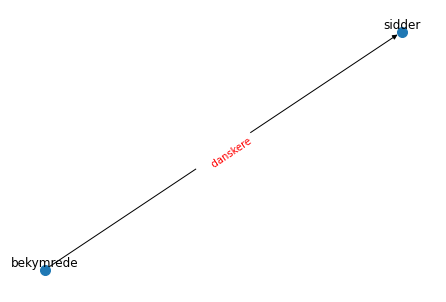

In [5]:
graph.plot_node(nodes = "bekymrede")

To handle this, `belief_graph` includes the following filters:

- ConfidenceFilter: filter by how confident the model is   
- ContinuousFilter: only includes words that appear continuously
- CountFilter: require nodes to appear a certain number of times in the corpus
- DepFilter: include/exclude specific terms from a dependency parsing
- EntFilter: include/exclude specific named entities (LOC, PERS, ORG, MISC in Danish)
- PosFilter: include/exclude specific Parts-of-Speech tags
- LemmatizationFilter: use lemmas instead of tokens

These can be mixed and matched as you see fit. Let's see the effect of setting a confidence threshold and only including nodes that have the LOC or PERS tag.

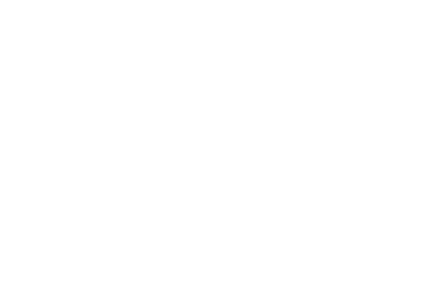

In [7]:
CONF_THRESHOLD = 0.8
conf_filter = bg.filters.ConfidenceFilter(threshold=CONF_THRESHOLD)

VALID_ENTITIES={"LOC", "PERS"}
ent_filter = bg.filters.EntFilter(valid=VALID_ENTITIES)

# To update the graph we pass the filters as a list
filters = [conf_filter, ent_filter]

graph.replace_filters(triplet_filters=filters)

# Let's see how the network has changed
graph.plot_node(nodes = "bekymrede")

# blank because "bekymrede" is not a named entity (and maybe below confidence threshold)

You can plot networks for multiple nodes by passing a list of node names to the `nodes` parameter in `graph.plot_node`. Similarly, it is easy to change filters: simply create the ones you want, and run `graph.replace_filters` with your updated filter list. 

If you pass the keyword "all" to `nodes` the network will include all nodes in the graph. This is especially useful in combination with `return_graph=True`, as this returns the networkx graph. With this, you can explore the entire network and calculate various measures such as centrality, degree, etc.

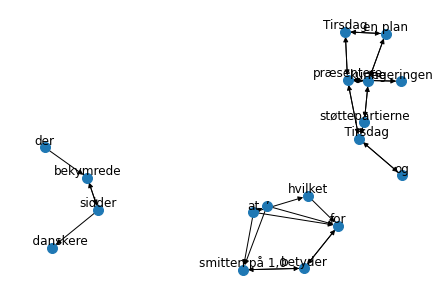

In [10]:
graph.replace_filters(triplet_filters=[])

network = graph.plot_node(nodes = "all", return_graph=True)

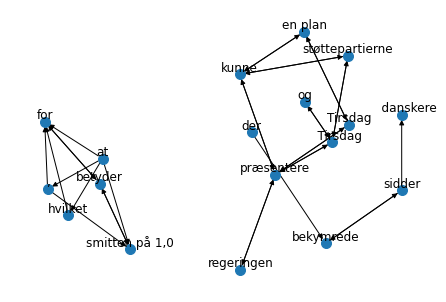

In [11]:
# Change spacing between nodes with the 'k' parameter (default=0.5)
graph.plot_node(nodes = "all", k=1)

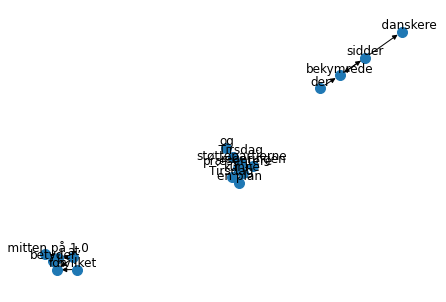

In [12]:
graph.plot_node(nodes = "all", k=0.1)

In [13]:
# Do stuff with the networkx graph here
network.G.degree

DiDegreeView({'\n    Tirsdag': 6, 'og': 2, 'præsentere': 8, 'støttepartierne': 4, ',': 5, 'for': 5, 'smitten på 1,0': 4, 'Tirsdag': 4, 'en plan': 4, 'at': 4, 'hvilket': 2, 'bekymrede': 3, 'sidder': 3, 'betyder': 4, 'der': 1, 'kunne': 6, 'regeringen': 2, '\n    danskere': 1})